<a href="https://www.kaggle.com/code/mohammedalhawti/riyadh-real-estate-market?scriptVersionId=160261441" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

## Introduction 

In this analysis, we delve into the vibrant and evolving real estate market of Riyadh, the capital city of Saudi Arabia. Our focus is on comprehensively understanding the market trends, transaction dynamics, and property classifications within the city for the third quarter of 2023.


## Objectives

1- Market Analysis
To conduct a comprehensive analysis of the real estate market in Saudi Arabia for the third quarter of 2023, focusing on key metrics such as average prices, sales volume, and market trends.

2- Property Type Assessment
To evaluate the performance of different types of properties (e.g., residential, commercial, land) in terms of demand, price trends, and investment returns.

3- Predictive Analysis
To utilize historical data to predict future trends in the real estate market, aiding in investment decisions and market strategy formulation.

4- Impact of Economic Factors
To analyze how external economic factors (like interest rates, GDP growth, and government policies) influence the real estate market 

5- Identifying Investment Opportunities
To identify potential investment opportunities within the market, based on analysis of data trends and market forecasts.

## First, import the necessary libraries

In [1]:
!pip install arabic-reshaper
import arabic_reshaper
import warnings
warnings.filterwarnings('ignore')
import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.font_manager import FontProperties
from bidi.algorithm import get_display
from io import BytesIO

## import and exploer the data

In [2]:
df= pd.read_csv('/kaggle/input/saudi-arabia-real-estate-market-2023-q3/Saudi Arabia Real Estate Market 2023 Q3.csv')
df

,Region,City,City / District,Transaction Reference Number,Date,Property Classification,Property Type,Number of Properties,Price,Area
0,منطقة الرياض,الافلاج,الافلاج/ الملك عبدالله,20289286,2023/07/01,سكني,قطعة أرض,1,53000.00,660.00
1,منطقة الرياض,الرياض,الرياض/عريض,20289169,2023/07/01,سكني,قطعة أرض,1,300000.00,450.00
2,منطقة الرياض,الرياض,الرياض/نمار,20289165,2023/07/01,سكني,قطعة أرض,1,430000.00,300.00
3,منطقة المدينة المنوره,الصويدره,الصويدره/أخرى,20289168,2023/07/01,سكني,قطعة أرض,1,73000.00,642.06
4,منطقة حائل,الشنان,الشنان/أخرى,20289133,2023/07/01,سكني,قطعة أرض,1,50000.00,1050.00
...,...,...,...,...,...,...,...,...,...,...
48540,منطقة مكة المكرمه,مكة المكرمة,مكة المكرمة/ ولى العهد للمنح رقم 1,21102663,2023/09/30,سكني,قطعة أرض,1,1090000.00,432.00
48541,منطقة مكة المكرمه,مكة المكرمة,مكة المكرمة/ المسفلة رقم 4,21103118,2023/09/30,سكني,شقة,1,450000.00,166.40
48542,منطقة عسير,ابها,ابها/ رحيين علكم,21103503,2023/09/30,سكني,قطعة أرض,1,380000.00,2388.00
48543,منطقة حائل,حائل,حائل/ قرية أجا,21102998,2023/09/30,سكني,قطعة أرض,1,811142.54,725.53


In [3]:
df.describe

<bound method NDFrame.describe of                       Region         City  \
0               منطقة الرياض      الافلاج   
1               منطقة الرياض       الرياض   
2               منطقة الرياض       الرياض   
3      منطقة المدينة المنوره     الصويدره   
4                 منطقة حائل       الشنان   
...                      ...          ...   
48540      منطقة مكة المكرمه  مكة المكرمة   
48541      منطقة مكة المكرمه  مكة المكرمة   
48542             منطقة عسير         ابها   
48543             منطقة حائل         حائل   
48544          منطقة الشرقية       الدمام   

                           City / District  Transaction Reference Number  \
0                  الافلاج/ الملك عبدالله                       20289286   
1                              الرياض/عريض                      20289169   
2                              الرياض/نمار                      20289165   
3                            الصويدره/أخرى                      20289168   
4                              الشنان/أخرى   

In [4]:
df.dtypes

Region                           object
City                             object
City / District                  object
Transaction Reference Number      int64
Date                             object
Property Classification          object
Property Type                    object
Number of Properties              int64
Price                           float64
Area                            float64
dtype: object

In [5]:
# Display the count of missing values for each column.
missing_values_count = df.isnull().sum()
missing_values_count

Region                          0
City                            0
City / District                 0
Transaction Reference Number    0
Date                            0
Property Classification         0
Property Type                   0
Number of Properties            0
Price                           0
Area                            0
dtype: int64

In [6]:
# Filtering the DataFrame to include only data from the city of Riyadh
# This is achieved by checking if the 'City' column matches 'الرياض'
riyadh_data = df[df['City'] == 'الرياض']

# Selecting specific columns for the Riyadh data
riyadh_data = riyadh_data[['City', 'City / District', 'Date', 'Property Classification', 
                           'Property Type', 'Number of Properties', 'Price', 'Area']]

# Displaying the resulting DataFrame
riyadh_data


,City,City / District,Date,Property Classification,Property Type,Number of Properties,Price,Area
1,الرياض,الرياض/عريض,2023/07/01,سكني,قطعة أرض,1,300000.0,450.00
2,الرياض,الرياض/نمار,2023/07/01,سكني,قطعة أرض,1,430000.0,300.00
9,الرياض,الرياض/الخير,2023/07/01,سكني,قطعة أرض,1,445000.0,403.00
17,الرياض,الرياض/بدر,2023/07/02,سكني,شقة,1,501600.0,138.30
22,الرياض,الرياض/الغنامية,2023/07/02,سكني,قطعة أرض,1,185000.0,412.50
...,...,...,...,...,...,...,...,...
48519,الرياض,الرياض/القدس,2023/09/30,سكني,شقة,1,900000.0,185.25
48520,الرياض,الرياض/القدس,2023/09/30,سكني,شقة,1,850000.0,175.90
48521,الرياض,الرياض/الياسمين,2023/09/30,سكني,شقة,1,917000.0,135.62
48525,الرياض,الرياض/نمار,2023/09/30,تجاري,قطعة أرض,1,950000.0,750.00


## Create a database about the city of Riyadh

In [7]:
# Filter for 'الرياض' and select specific columns
riyadh_data = df[df['City'] == 'الرياض'][['City', 'City / District', 'Date', 'Property Classification', 'Property Type', 'Number of Properties', 'Price', 'Area']]

# Remove 'الرياض' and '/' from 'City / District' column
riyadh_data['City / District'] = riyadh_data['City / District'].str.replace('الرياض', '').str.replace('/', '')

# Rename 'City / District' column to 'District'
riyadh_data.rename(columns={'City / District': 'District'}, inplace=True)

# Display the DataFrame
riyadh_data

,City,District,Date,Property Classification,Property Type,Number of Properties,Price,Area
1,الرياض,عريض,2023/07/01,سكني,قطعة أرض,1,300000.0,450.00
2,الرياض,نمار,2023/07/01,سكني,قطعة أرض,1,430000.0,300.00
9,الرياض,الخير,2023/07/01,سكني,قطعة أرض,1,445000.0,403.00
17,الرياض,بدر,2023/07/02,سكني,شقة,1,501600.0,138.30
22,الرياض,الغنامية,2023/07/02,سكني,قطعة أرض,1,185000.0,412.50
...,...,...,...,...,...,...,...,...
48519,الرياض,القدس,2023/09/30,سكني,شقة,1,900000.0,185.25
48520,الرياض,القدس,2023/09/30,سكني,شقة,1,850000.0,175.90
48521,الرياض,الياسمين,2023/09/30,سكني,شقة,1,917000.0,135.62
48525,الرياض,نمار,2023/09/30,تجاري,قطعة أرض,1,950000.0,750.00


## What are the highest district in terms of number of deals ?

In [8]:

# Counting the number of real estate deals in each district within Riyadh
# 'value_counts()' is used to count occurrences of each unique value in the 'District' column
district_counts = pd.DataFrame({'count': riyadh_data['District'].value_counts()}).reset_index()

# Renaming the columns for clarity
# 'reset_index()' used in the previous step adds a new index and shifts 'District' to a column
# The new DataFrame has two columns: one for the district name and one for the count
district_counts.columns = ['District', 'count']

# Displaying the DataFrame with district counts
district_counts


,District,count
0,الوسام,1910
1,الخير,1020
2,السحاب,951
3,شرق,641
4,عريض,605
...,...,...
170,شمال,1
171,الشعاب,1
172,حلة العماج,1
173,الاسكان,1


--2024-01-24 13:52:36--  https://github.com/M7amdzx/arial-font/raw/main/alfont_com_arial-1.ttf
Resolving github.com (github.com)... 140.82.121.3
Connecting to github.com (github.com)|140.82.121.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/M7amdzx/arial-font/main/alfont_com_arial-1.ttf [following]
--2024-01-24 13:52:36--  https://raw.githubusercontent.com/M7amdzx/arial-font/main/alfont_com_arial-1.ttf
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1036584 (1012K) [application/octet-stream]
Saving to: '/tmp/arial-font.ttf'

/tmp/arial-font.ttf 100%[===================>]   1012K  --.-KB/s    in 0.02s   

2024-01-24 13:52:37 (44.8 MB/s) - '/tmp/arial-font.ttf' saved [1036584/1036584]



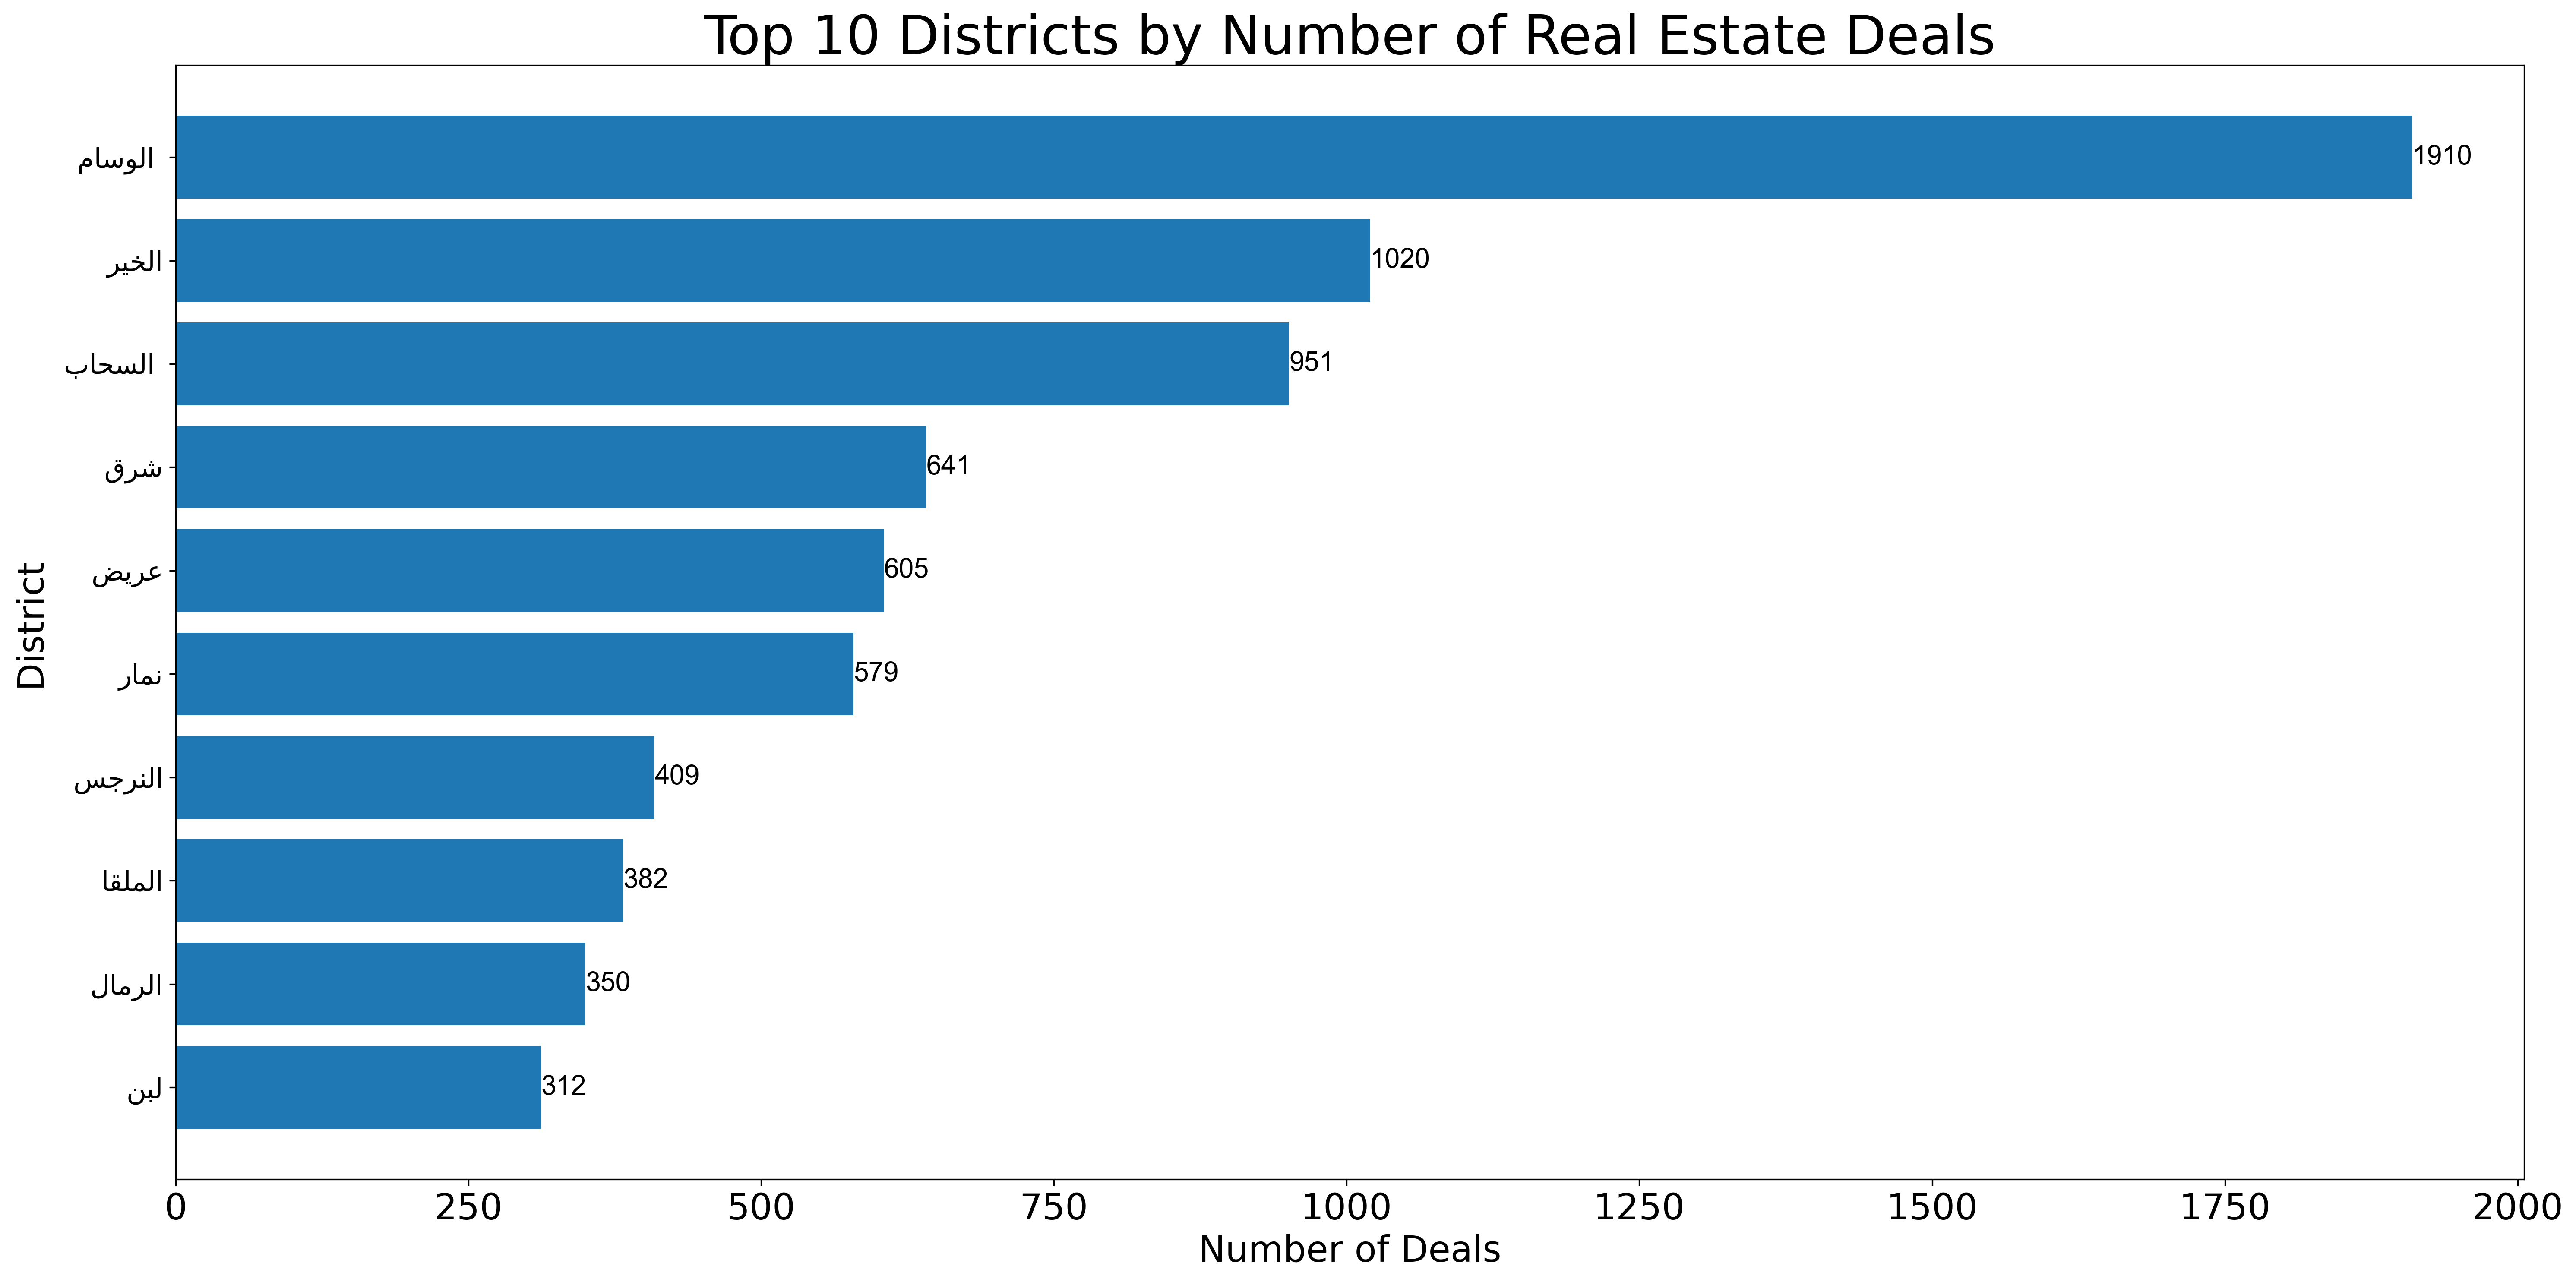

In [9]:
!wget https://github.com/M7amdzx/arial-font/raw/main/alfont_com_arial-1.ttf -O /tmp/arial-font.ttf

import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties
import arabic_reshaper
from bidi.algorithm import get_display

# Function to reshape and apply bidi algorithm to Arabic text
def arabic_format(text):
    reshaped_text = arabic_reshaper.reshape(text)
    return get_display(reshaped_text)

# Load the font into matplotlib from the downloaded file
arabic_font = FontProperties(fname='/tmp/arial-font.ttf')

# Assuming district_counts is already defined
# Select the top 10 rows for plotting
top_districts = district_counts.head(10)

fig, ax = plt.subplots(figsize=(20, 10), dpi=300)

# Apply the Arabic formatting to each district name
top_districts['District'] = top_districts['District'].apply(arabic_format)

# Plot the horizontal bars
bars = ax.barh(top_districts['District'][::-1], top_districts['count'][::-1], align='center')

ax.set_xlabel('Number of Deals', fontsize=20)
ax.set_ylabel('District', fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=15,)
plt.title("Top 10 Districts by Number of Real Estate Deals", fontsize=30)

# Add count values above the bars
for bar, count in zip(bars, top_districts['count'][::-1]):
    width = bar.get_width()
    ax.text(width, bar.get_y() + bar.get_height() / 2, f'{count}', ha='left', va='center', fontsize=15, fontproperties=arabic_font)

plt.tight_layout()
plt.show()


## What are the most common property classifications in Riyadh ?

In [10]:
# Creating a DataFrame to count the occurrences of each property classification in Riyadh
property_classification = pd.DataFrame({'count': riyadh_data['Property Classification'].value_counts()}).reset_index()
property_classification.columns = ['Property Classification', 'count']
property_classification


,Property Classification,count
0,سكني,12380
1,تجاري,1199


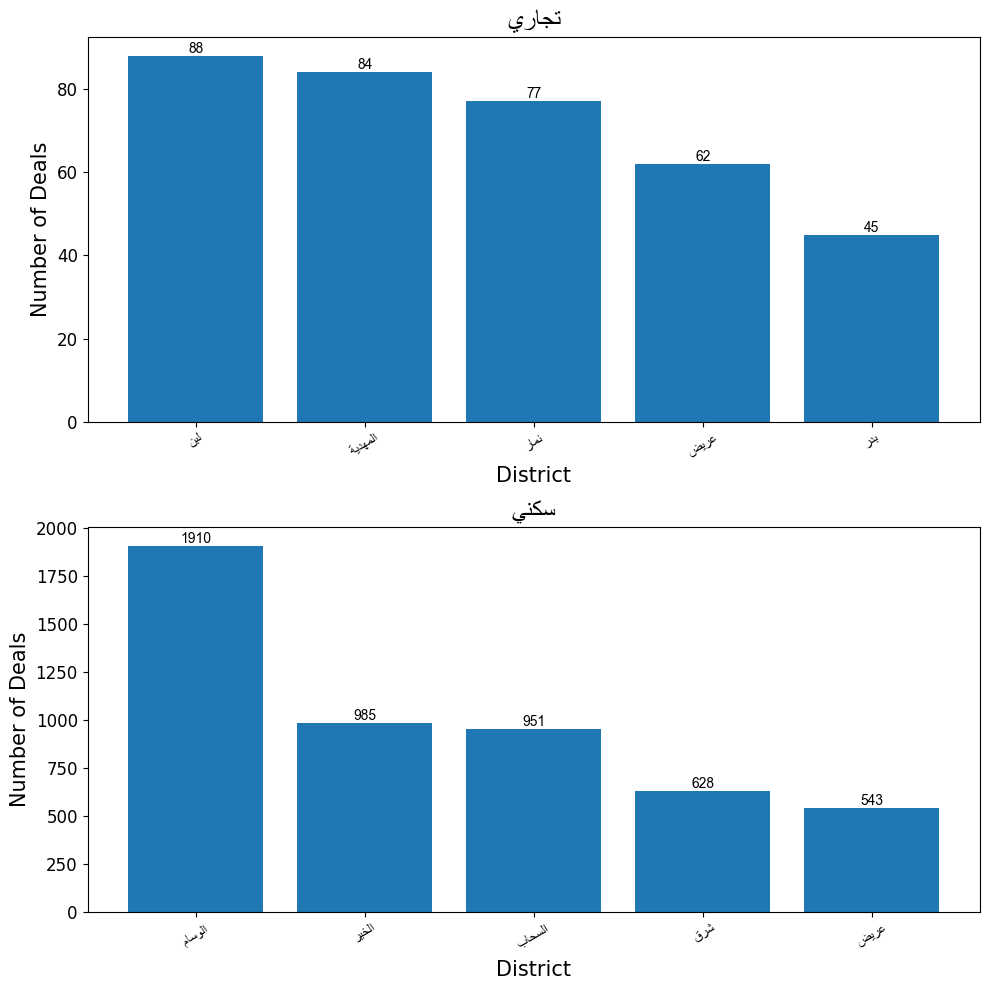

In [11]:
# Function to reshape Arabic text for correct display
def reshape_arabic(text):
    reshaped_text = arabic_reshaper.reshape(text)
    return get_display(reshaped_text)

# Group data by 'Property Classification' and 'District', then get the top 5 districts for each property classification
grouped_data = riyadh_data.groupby(['Property Classification', 'District']).size().reset_index(name='Counts')
top_districts_by_classification = grouped_data.groupby('Property Classification').apply(lambda x: x.nlargest(5, 'Counts')).reset_index(drop=True)

# Create a plot for each property classification
num_classifications = top_districts_by_classification['Property Classification'].nunique()
fig, axs = plt.subplots(num_classifications, 1, figsize=(10, num_classifications * 5))

# Check if there are multiple classifications; if yes, create a bar chart for each
if num_classifications > 1:
    for i, (classification, data) in enumerate(top_districts_by_classification.groupby('Property Classification')):
        bars = axs[i].bar(data['District'].apply(reshape_arabic), data['Counts'])
        axs[i].set_title(reshape_arabic(classification), fontproperties=arabic_font, fontsize=18)
        axs[i].set_xlabel('District', fontsize=15)
        axs[i].set_ylabel('Number of Deals', fontsize=15)
        axs[i].tick_params(axis='both', which='major', labelsize=12)
        axs[i].set_xticklabels(data['District'].apply(reshape_arabic), fontproperties=arabic_font, rotation=30)

        # Adding numbers above each bar for clarity
        for bar in bars:
            yval = bar.get_height()
            axs[i].text(bar.get_x() + bar.get_width()/2, yval, int(yval), va='bottom', ha='center', fontproperties=arabic_font)
else:
    # If there's only one classification, create a single bar chart
    bars = axs.bar(top_districts_by_classification['District'].apply(reshape_arabic), top_districts_by_classification['Counts'])
    axs.set_title(reshape_arabic(top_districts_by_classification['Property Classification'].iloc[0]), fontproperties=arabic_font, fontsize=18)
    axs.set_xlabel('District', fontsize=15)
    axs.set_ylabel('Number of Deals', fontsize=15)
    axs.tick_params(axis='both', which='major', labelsize=12)
    axs.set_xticklabels(top_districts_by_classification['District'].apply(reshape_arabic), fontproperties=arabic_font, rotation=30)

    # Adding numbers above each bar for clarity
    for bar in bars:
        yval = bar.get_height()
        axs.text(bar.get_x() + bar.get_width()/2, yval, int(yval), va='bottom', ha='center', fontproperties=arabic_font)

# Display the plot in a layout that fits all subplots
plt.tight_layout()
plt.show()

## What is the most common District for each Property Type ?

In [12]:
# Creating a DataFrame to count the occurrences of each property type in Riyadh
property_type = pd.DataFrame({'count': riyadh_data['Property Type'].value_counts()}).reset_index()
property_type.columns = ['Property Type', 'count']
property_type

,Property Type,count
0,قطعة أرض,11137
1,شقة,2328
2,بيت,61
3,فيلا,21
4,معرض/محل,18
5,عمارة,8
6,مرفق,3
7,مركز تجاري,3


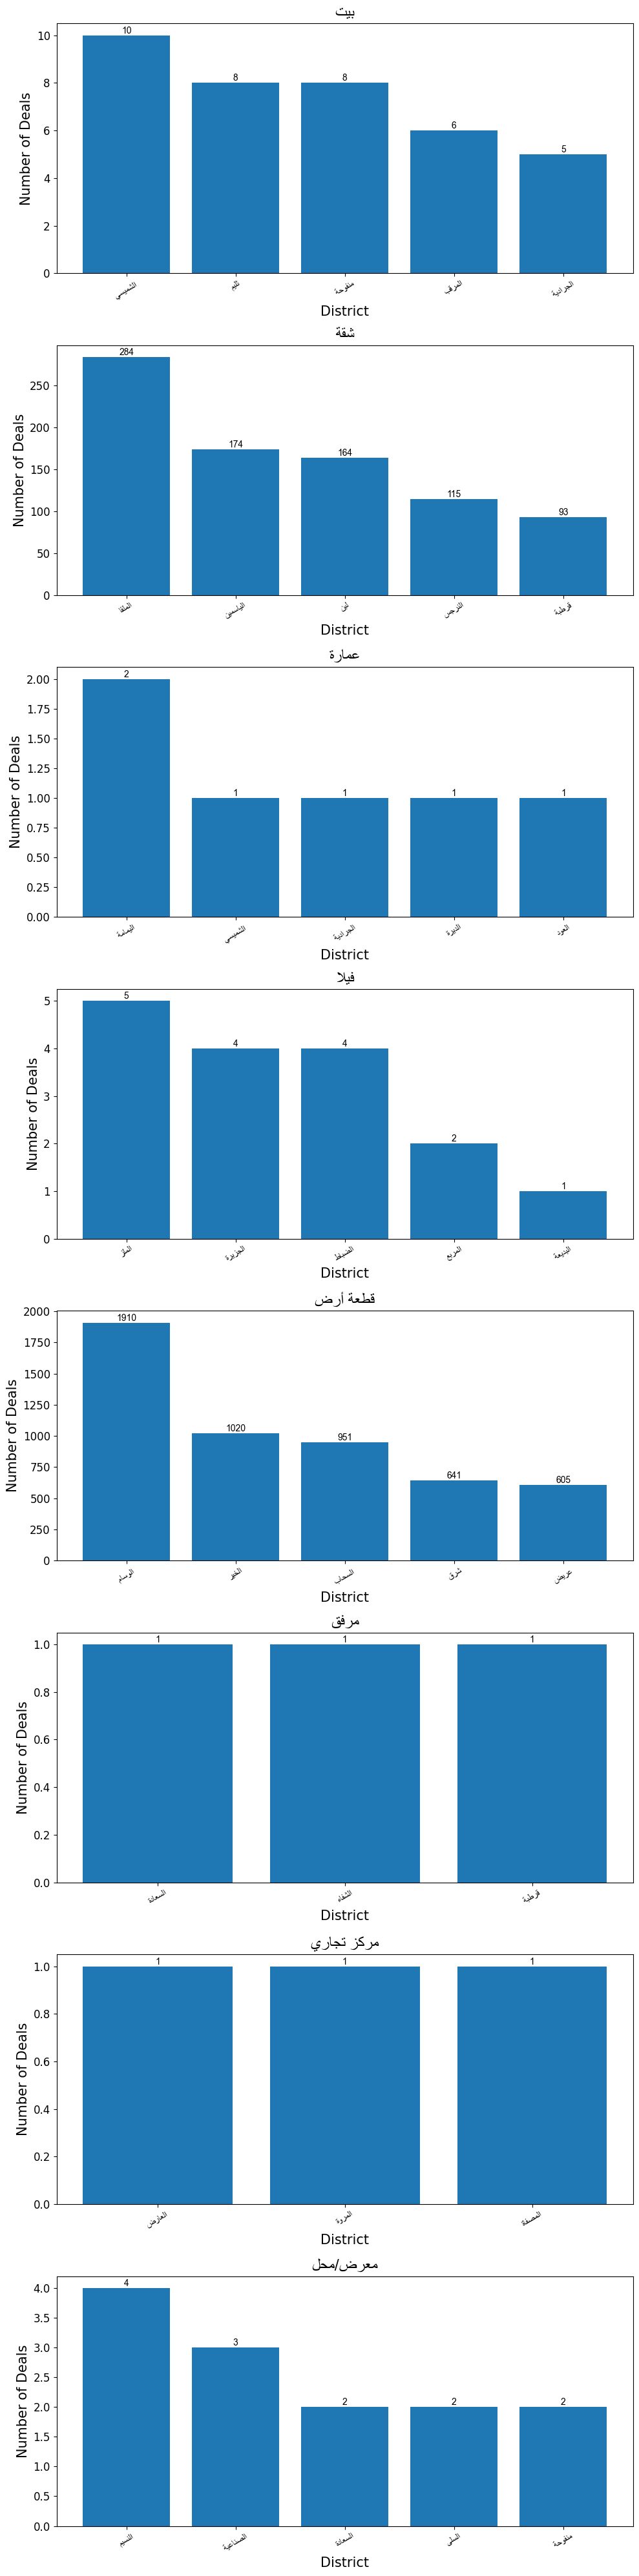

In [13]:

# Function to reshape Arabic text for correct display
def reshape_arabic(text):
    reshaped_text = arabic_reshaper.reshape(text)
    return get_display(reshaped_text)


# Group data by 'Property Type' and 'District', then get the top 5 districts for each property type
grouped_data = riyadh_data.groupby(['Property Type', 'District']).size().reset_index(name='Counts')
top_districts_by_type = grouped_data.groupby('Property Type').apply(lambda x: x.nlargest(5, 'Counts')).reset_index(drop=True)

# Determine the number of property types to create appropriate subplots
num_types = top_districts_by_type['Property Type'].nunique()
fig, axs = plt.subplots(num_types, 1, figsize=(10, num_types * 5))

# Check if there are multiple property types; if yes, create a bar chart for each
if num_types > 1:
    for i, (ptype, data) in enumerate(top_districts_by_type.groupby('Property Type')):
        bars = axs[i].bar(data['District'].apply(reshape_arabic), data['Counts'])
        axs[i].set_title(reshape_arabic(ptype), fontproperties=arabic_font, fontsize=18)
        axs[i].set_xlabel('District',  fontsize=15)
        axs[i].set_ylabel('Number of Deals', fontsize=15)
        axs[i].tick_params(axis='both', which='major', labelsize=12)
        axs[i].set_xticklabels(data['District'].apply(reshape_arabic), fontproperties=arabic_font, rotation=30)

        # Adding numbers above bars
        for bar in bars:
            yval = bar.get_height()
            axs[i].text(bar.get_x() + bar.get_width()/2, yval, int(yval), va='bottom', ha='center', fontproperties=arabic_font)

else:
    bars = axs.bar(top_districts_by_type['District'].apply(reshape_arabic), top_districts_by_type['Counts'])
    axs.set_title(reshape_arabic(top_districts_by_type['Property Type'].iloc[0]), fontproperties=arabic_font, fontsize=18)
    axs.set_xlabel('District', fontsize=15)
    axs.set_ylabel('Number of Deals', fontsize=15)
    axs.tick_params(axis='both', which='major', labelsize=12)
    axs.set_xticklabels(top_districts_by_type['District'].apply(reshape_arabic), fontproperties=arabic_font, rotation=30)

    # Adding numbers above bars
    for bar in bars:
        yval = bar.get_height()
        axs.text(bar.get_x() + bar.get_width()/2, yval, int(yval), va='bottom', ha='center', fontproperties=arabic_font)

# Show the plot
plt.tight_layout()
plt.show()


## Which month recorded the most real estate deals in Riyadh in Q3 of 2023 ?

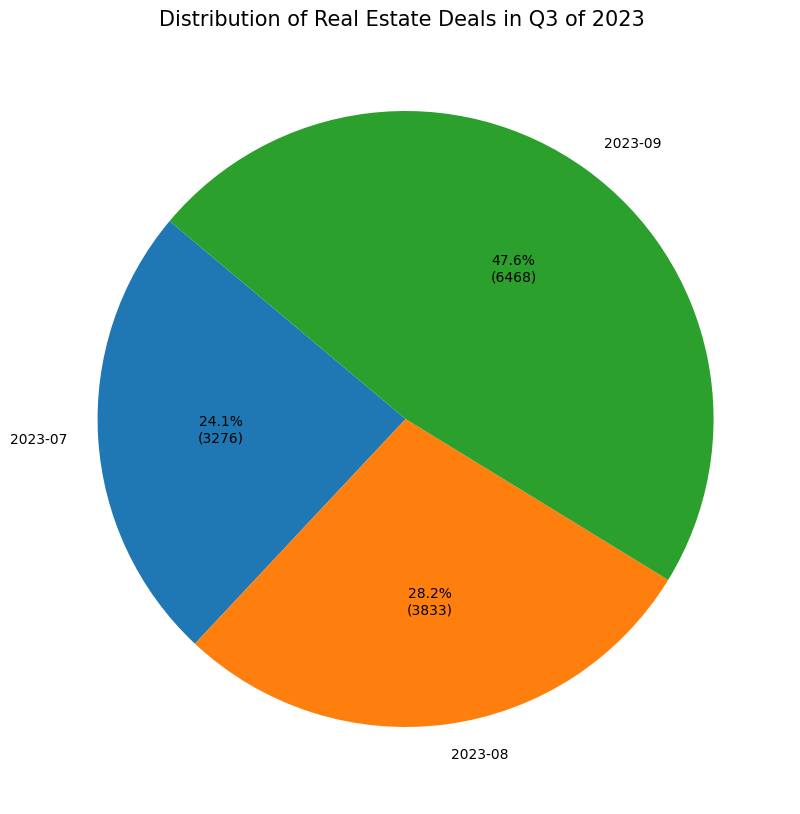

In [14]:

# Convert 'Date' to datetime and extract 'Year' and 'Month'
riyadh_data['Date'] = pd.to_datetime(riyadh_data['Date'])
riyadh_data['Year'] = riyadh_data['Date'].dt.year
riyadh_data['Month'] = riyadh_data['Date'].dt.month


# Aggregate deals by month (regardless of year)
monthly_deals = riyadh_data.groupby(['Year', 'Month']).size()

# Custom autopct function to show both percentage and actual count
def custom_autopct(pct, allvals):
    absolute = int(pct/100.*sum(allvals))
    return f"{pct:.1f}%\n({absolute:d})"

# Plotting
plt.figure(figsize=(10, 10))
plt.pie(monthly_deals, labels=[f'{year}-{month:02d}' for year, month in monthly_deals.index], autopct=lambda pct: custom_autopct(pct, monthly_deals), startangle=140)
plt.title ("Distribution of Real Estate Deals in Q3 of 2023 ",  fontsize=15)


plt.show()


## What are the top 10 real estate deals in terms of price ?

In [15]:
# Sort the data by 'Price' in descending order
top_deals = riyadh_data.sort_values(by='Price', ascending=False)

# Select the top 10 deals
top_10_deals = top_deals.head(10)

# Display details of property classification, type, and neighborhood
top_10_details = top_10_deals[['Price', 'Property Type', 'District', 'Property Classification']]

# Display the DataFrame
top_10_details


,Price,Property Type,District,Property Classification
5438,1.521462e+09,قطعة أرض,الرائد,تجاري
38195,6.289367e+08,قطعة أرض,الندى,تجاري
38218,6.220134e+08,قطعة أرض,النظيم,تجاري
18338,4.650000e+08,قطعة أرض,المربع,تجاري
21070,2.548018e+08,قطعة أرض,الخير,تجاري
4911,2.138231e+08,قطعة أرض,الملك فهد,تجاري
24025,2.034000e+08,قطعة أرض,الرحمانية,تجاري
31184,1.900000e+08,قطعة أرض,الياسمين,تجاري
14522,1.865687e+08,مركز تجاري,العارض,تجاري
3476,1.800000e+08,قطعة أرض,النخيل,تجاري


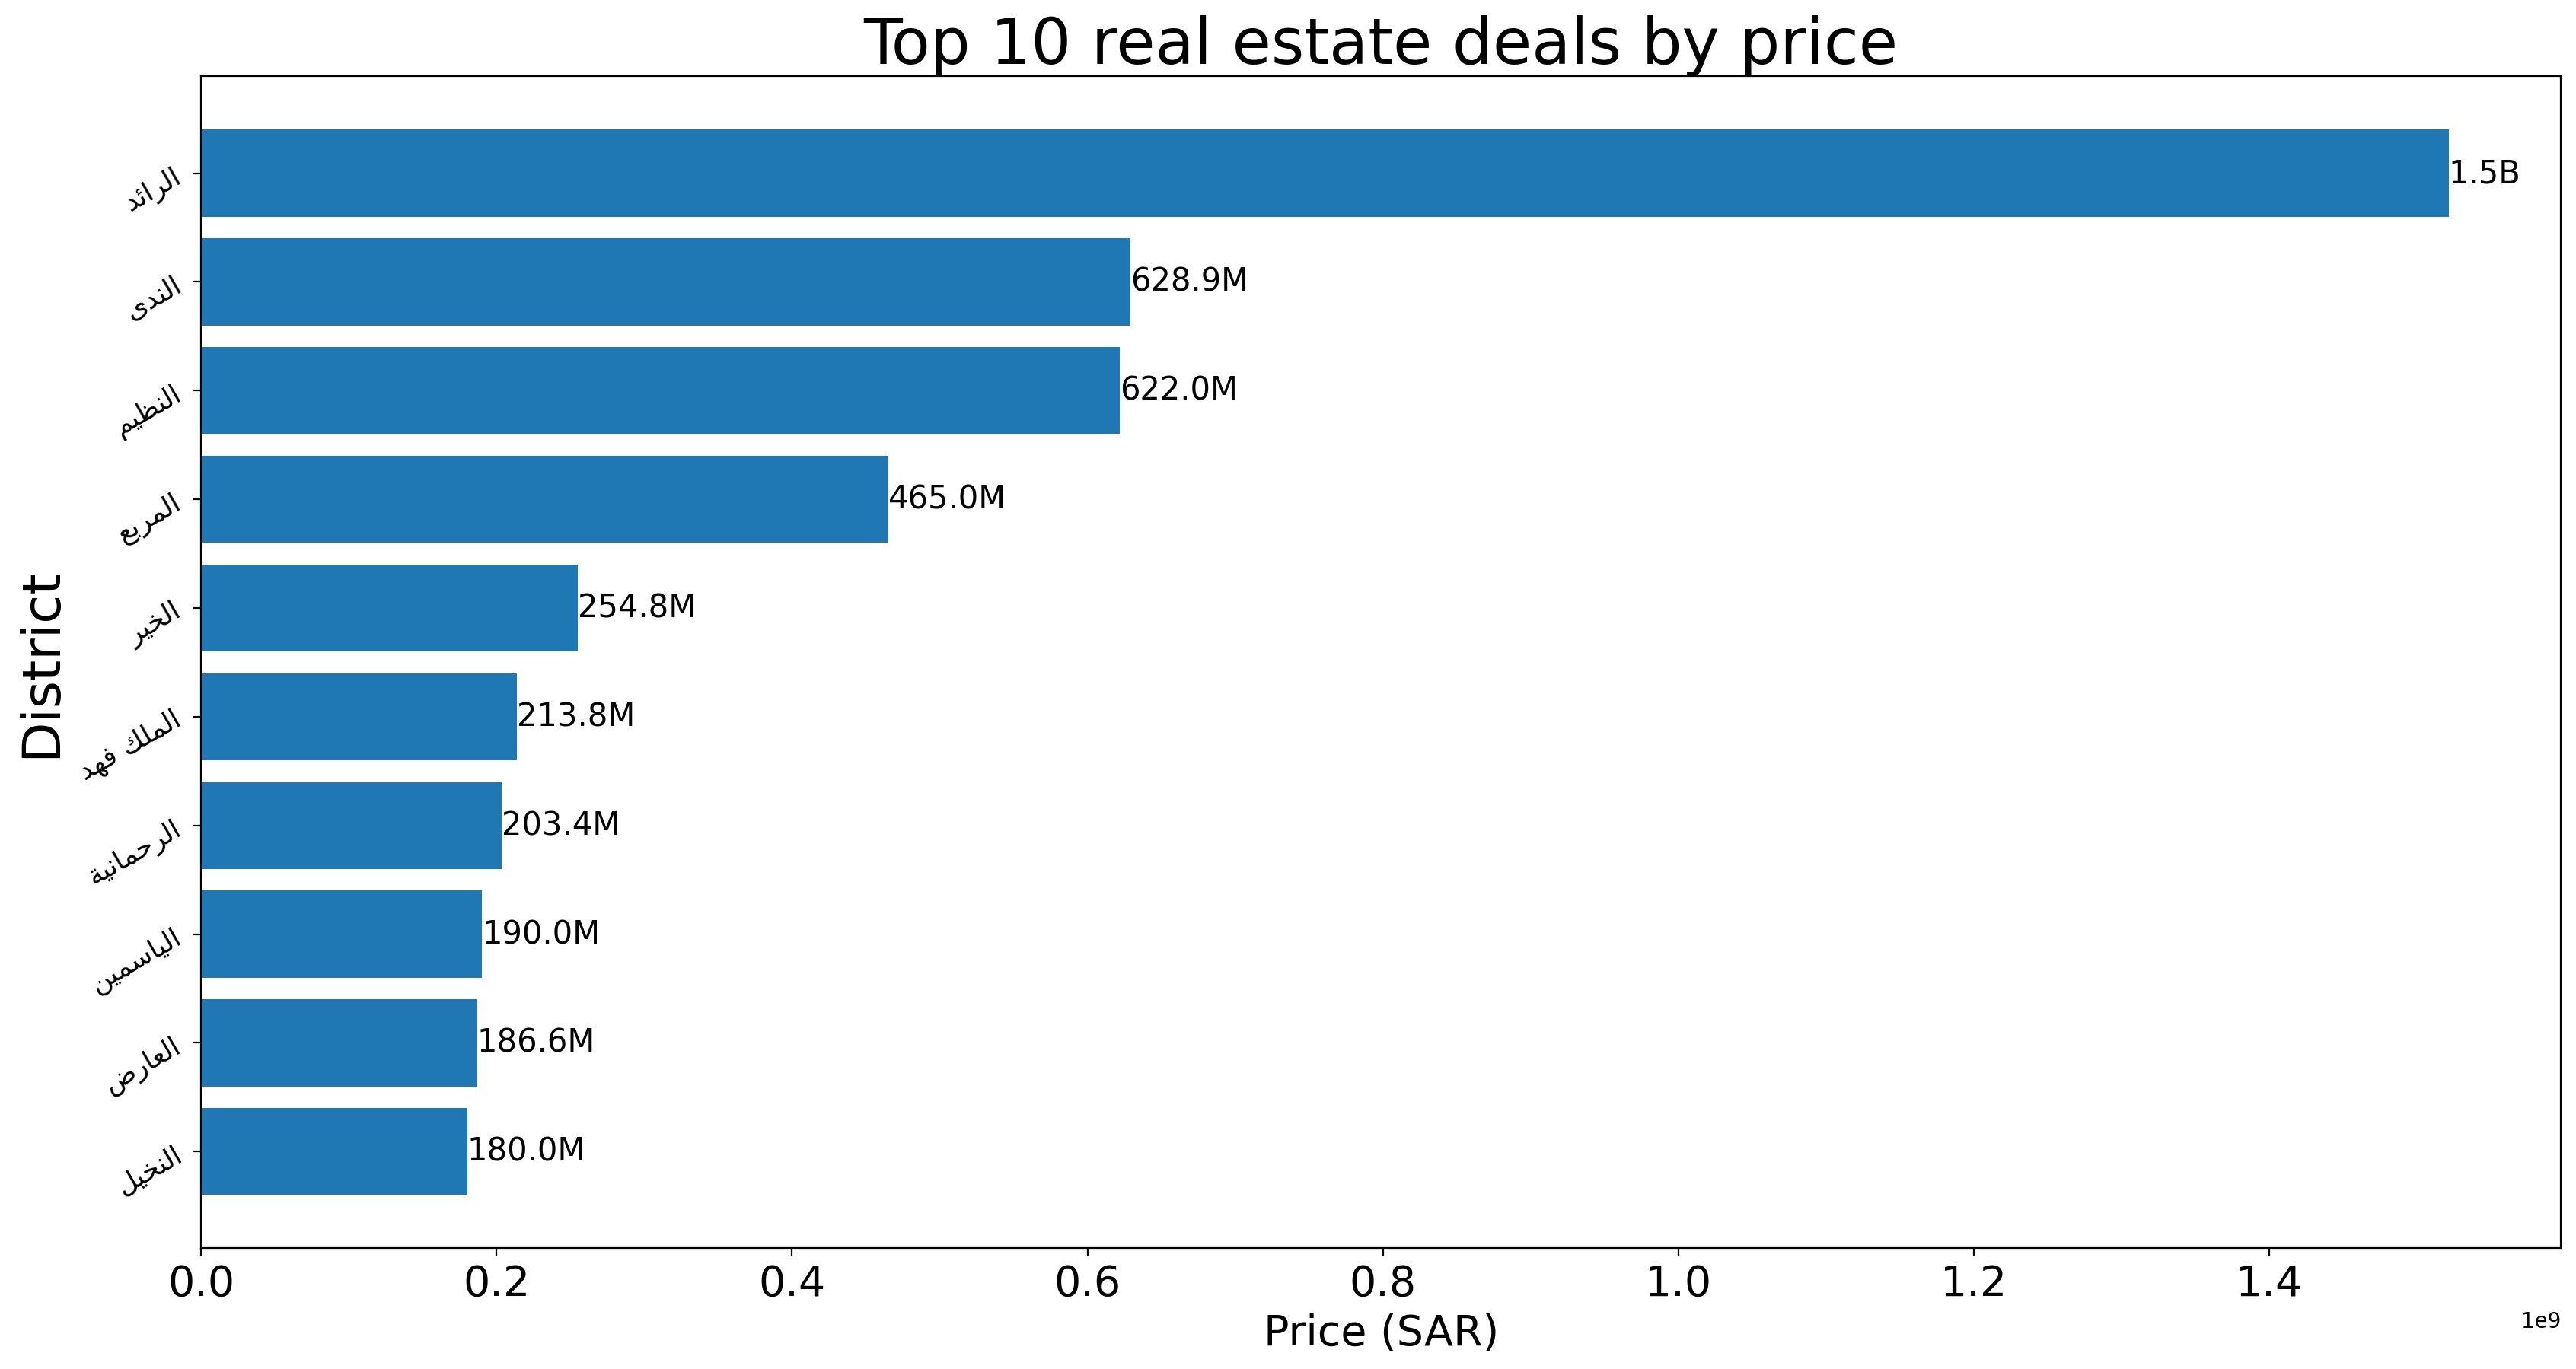

In [16]:

# Function to reshape Arabic text for correct display
def reshape_arabic(text):
    reshaped_text = arabic_reshaper.reshape(text)
    return get_display(reshaped_text)

# Updated function to format the price
def format_price(price):
    if price >= 1000000000:  # If price is in billions
        return f'{price / 1000000000:.1f}B'
    elif price >= 1000000:  # If price is in millions
        return f'{price / 1000000:.1f}M'
    elif price >= 1000:     # If price is in thousands
        return f'{price / 1000:.1f}K'
    else:
        return str(price)


# Sorting the top_10_deals DataFrame by 'Price' in descending order
top_10_deals_sorted = top_10_deals.sort_values(by='Price', ascending=False)


# Creating the plot
fig, ax = plt.subplots(figsize=(20, 10), dpi=200)

bars = ax.barh(top_10_deals_sorted['District'].apply(reshape_arabic), top_10_deals_sorted['Price'], align='center')

ax.invert_yaxis()  # Inverts the Y-axis
ax.set_xlabel(arabic_format('Price (SAR)'), fontsize=20)
ax.set_ylabel(arabic_format('District'), fontsize=25)
plt.xticks(fontsize=20)
plt.yticks(fontsize=13, rotation=30)
plt.title(arabic_format('Top 10 real estate deals by price'), fontsize=30)



# Add formatted price values above the bars
for bar in bars:
    price = bar.get_width()
    formatted_price = format_price(price)
    ax.text(price, bar.get_y() + bar.get_height() / 2, formatted_price, ha='left', va='center', fontsize=15)



plt.show()

## What are top 10 real estate deals in terms of area ?

In [17]:
# Sort the data by 'Area' in descending order
top_deals = riyadh_data.sort_values(by='Area', ascending=False)

# Select the top 10 deals
top_10_deals = top_deals.head(10)

# Display details of property type, district, and property classification
top_10_details = top_10_deals[['Area', 'Property Type', 'District', 'Property Classification']]

# Display the DataFrame
top_10_details


,Area,Property Type,District,Property Classification
38218,2958344.73,قطعة أرض,النظيم,تجاري
21070,553917.00,قطعة أرض,الخير,تجاري
5438,515749.59,قطعة أرض,الرائد,تجاري
38195,103104.38,قطعة أرض,الندى,تجاري
19644,66666.20,قطعة أرض,الجنادرية,سكني
4776,64963.50,قطعة أرض,المصفاة,سكني
4911,49726.31,قطعة أرض,الملك فهد,تجاري
14522,44421.12,مركز تجاري,العارض,تجاري
29800,40000.00,قطعة أرض,النرجس,تجاري
1654,34971.21,قطعة أرض,النرجس,سكني


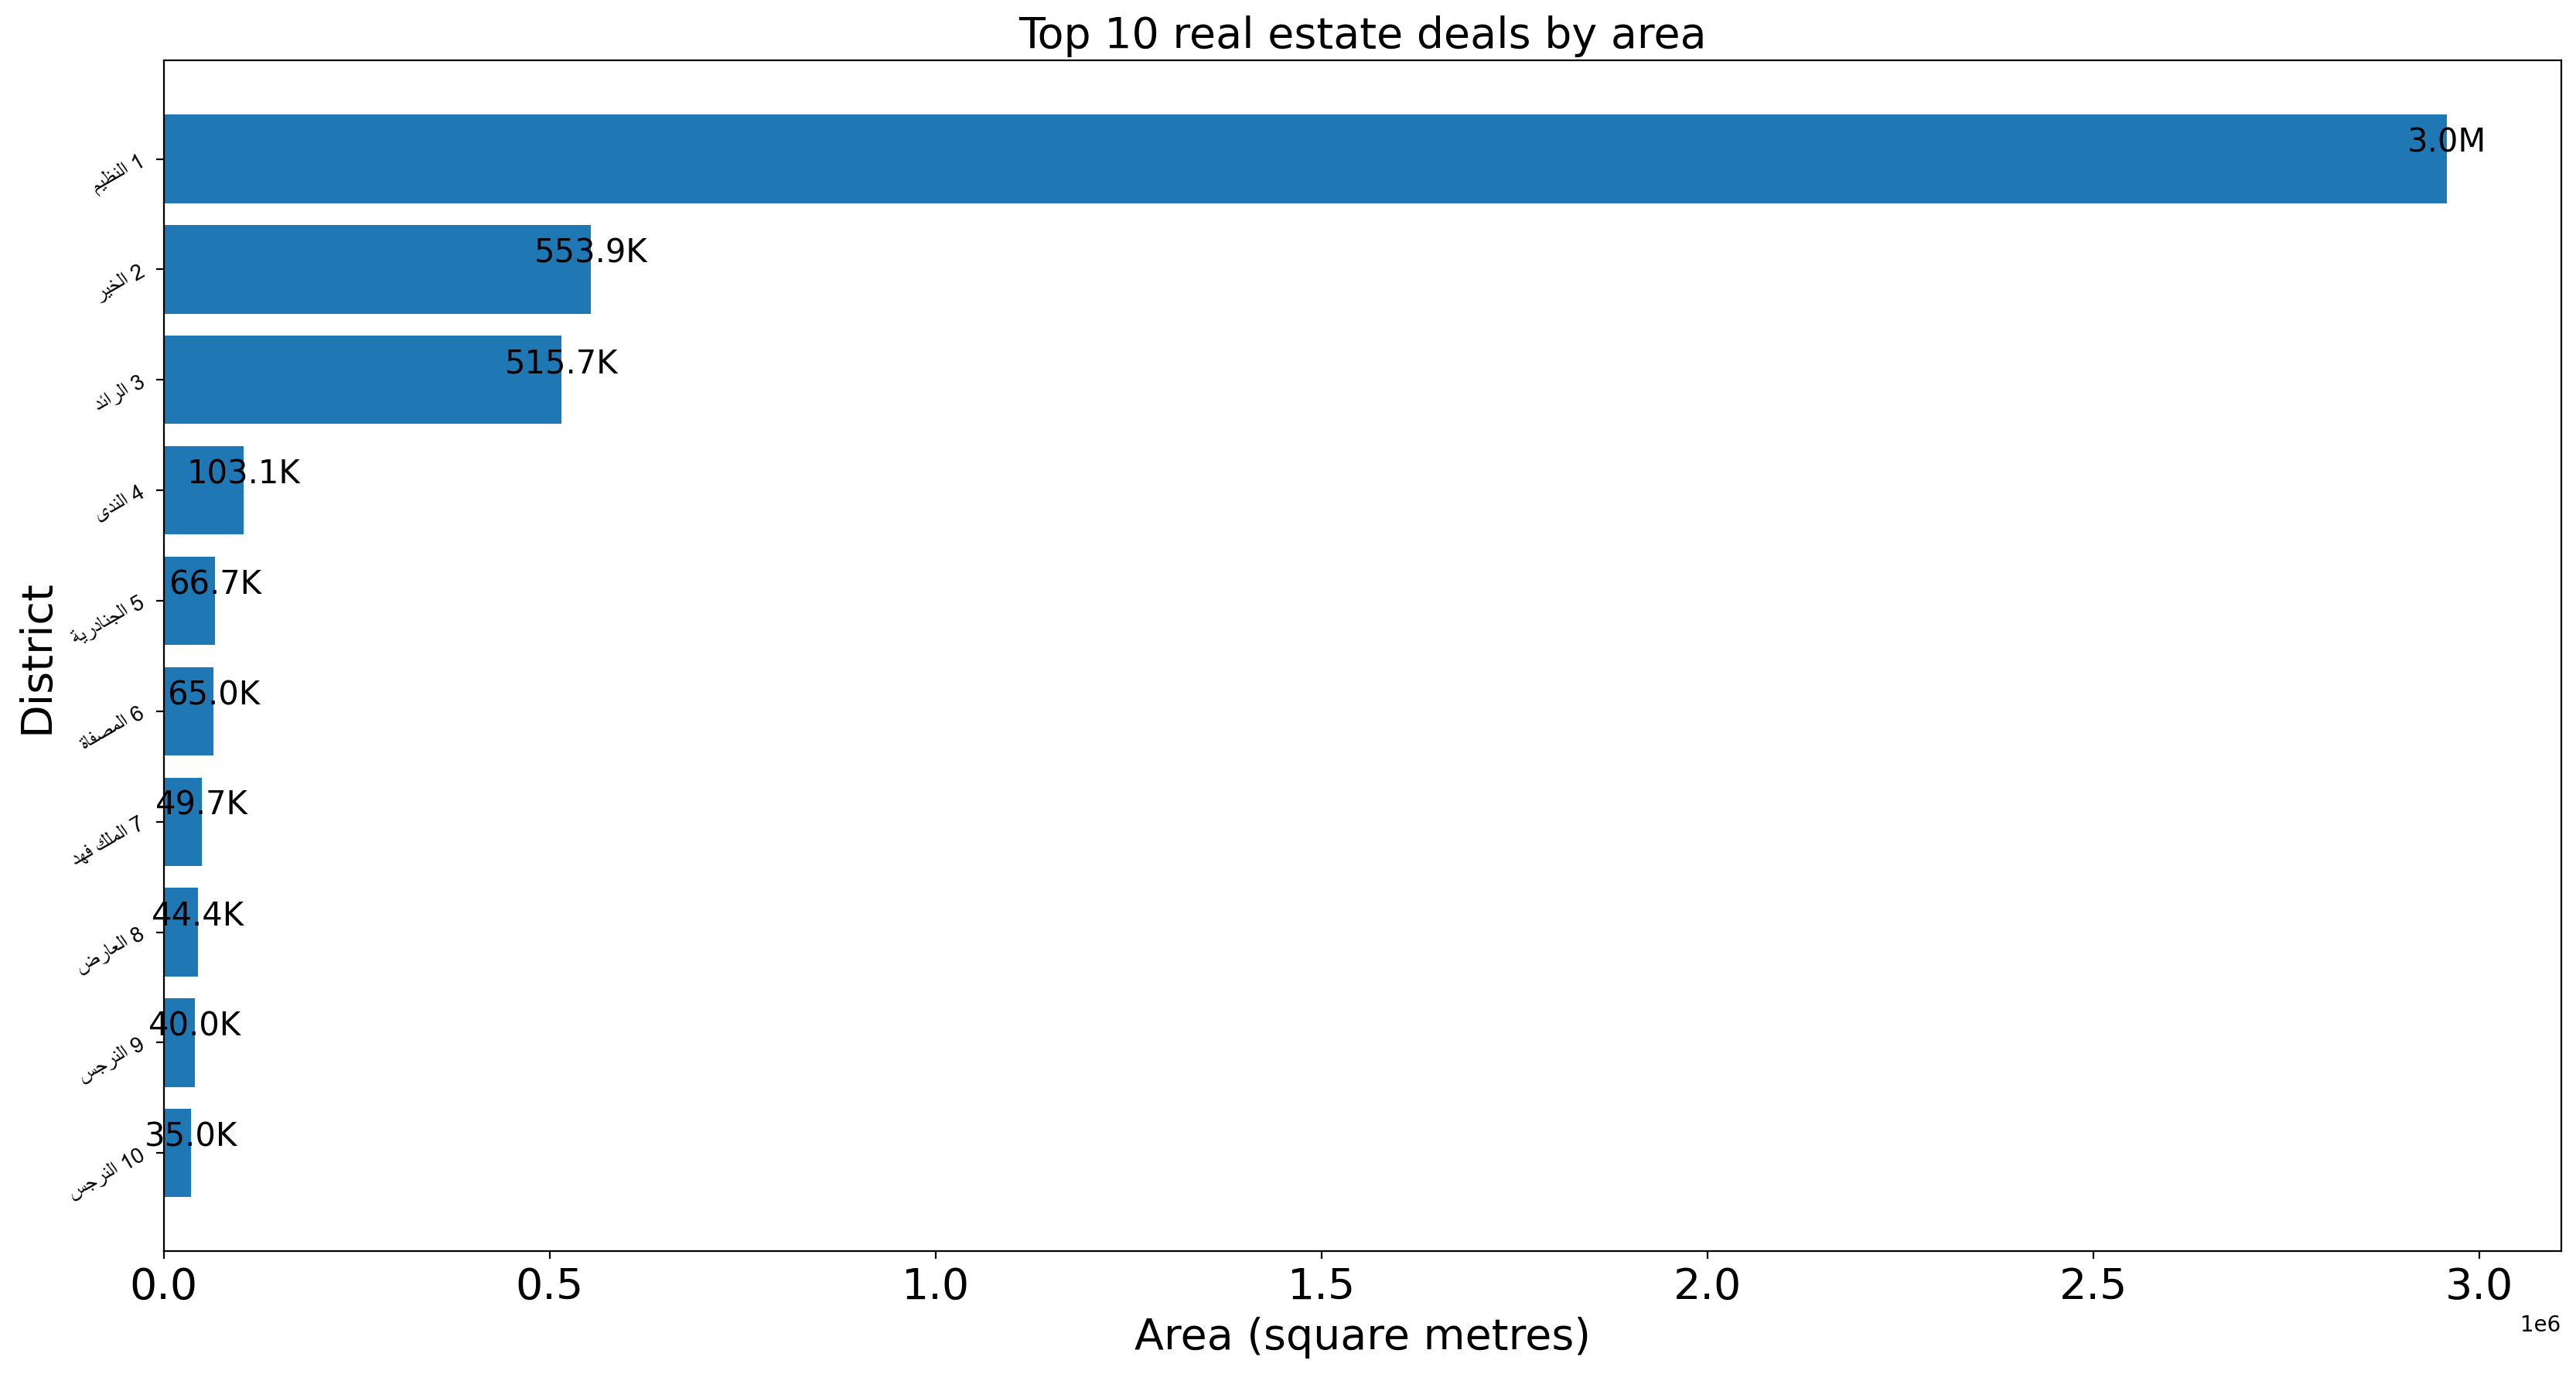

In [18]:
# Function to reshape Arabic text for correct display
def reshape_arabic(text):
    reshaped_text = arabic_reshaper.reshape(text)
    return get_display(reshaped_text)

# Function to format the area values
def format_value(value):
    if value >= 1000000000:  # If value is in billions
        return f'{value / 1000000000:.1f}B'
    elif value >= 1000000:  # If value is in millions
        return f'{value / 1000000:.1f}M'
    elif value >= 1000:     # If value is in thousands
        return f'{value / 1000:.1f}K'
    else:
        return str(value)


# Creating the plot
fig, ax = plt.subplots(figsize=(20, 10), dpi=200)

# Create a list of unique identifiers for each bar
unique_identifiers = [f"{reshape_arabic(district)} {idx+1}" for idx, district in enumerate(top_10_deals['District'])]

# Plot the horizontal bars
bars = ax.barh(unique_identifiers, top_10_deals['Area'], align='center')

ax.invert_yaxis()  # Inverts the Y-axis
ax.set_xlabel('Area (square metres)', fontsize=20)
ax.set_ylabel('District', fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=13, rotation=30, fontproperties=arabic_font)
plt.title('Top 10 real estate deals by area',fontsize=20)

# Add formatted area values above the bars
for bar in bars:
    area = bar.get_width()
    formatted_area = format_value(area)
    ax.text(area, bar.get_y() + bar.get_height() / 2, formatted_area, ha='center', va='bottom', fontsize=15)

plt.show()

## Conclusion
The analysis of Riyadh's real estate market for Q3 of 2023 reveals distinct trends and peak periods in property transactions. These findings provide valuable insights for stakeholders in understanding and navigating the market dynamics. Future analyses should build on these trends for a deeper understanding of Riyadh's evolving real estate landscape.